# othonormal set 
https://stackoverflow.com/questions/38426349/how-to-create-random-orthonormal-matrix-in-python-numpy
You can obtain a random n x n orthogonal matrix Q, (uniformly distributed over the manifold of n x n orthogonal matrices) by performing a QR factorization of an n x n matrix with elements i.i.d. Gaussian random variables of mean 0 and variance 1. Here is an example:

In [9]:
import numpy as np
from scipy.linalg import qr

n = 3
H = np.random.randn(n, n)
Q, R = qr(H)

print ("random n x n othogonal matrix:\n{}".format(Q))

print ("Gaussian random variabels of mean 0 and variance 1:\n{}".format(R))

print ("Innerdot products:\n{}".format(Q.dot(Q.T)))

random n x n othogonal matrix:
[[-0.46953914  0.45903383 -0.75420219]
 [ 0.66552679 -0.3773131  -0.64397897]
 [-0.5801785  -0.8043151  -0.12833605]]
Gaussian random variabels of mean 0 and variance 1:
[[-2.80483068  0.70954093  0.08727525]
 [ 0.          1.80242019 -0.25421399]
 [ 0.          0.         -0.10253017]]
Innerdot products:
[[1.00000000e+00 2.21147983e-17 9.44264275e-17]
 [2.21147983e-17 1.00000000e+00 3.98563306e-16]
 [9.44264275e-17 3.98563306e-16 1.00000000e+00]]


EDIT: (Revisiting this answer after the comment by @g g.) The claim above on the QR decomposition of a Gaussian matrix providing a uniformly distributed (over the, so called, Stiefel manifold) orthogonal matrix is suggested by Theorems 2.3.18-19 of this reference. Note that the statement of the result suggests a "QR-like" decomposition, however, with the triangular matrix R having positive elements.

Apparently, the qr function of scipy (numpy) function does not guarantee positive diagonal elements for R and the corresponding Q is actually not uniformly distributed. This has been observed in this monograph, Sec. 4.6 (the discussion refers to MATLAB, but I guess both MATLAB and scipy use the same LAPACK routines). It is suggested there that the matrix Q provided by qr is modified by post multiplying it with a random unitary diagonal matrix.

Below I reproduce the experiment in the above reference, plotting the empirical distribution (histogram) of phases of eigenvalues of the "direct" Q matrix provided by qr, as well as the "modified" version, where it is seen that the modified version does indeed have a uniform eigenvalue phase, as would be expected from a uniformly distributed orthogonal matrix.

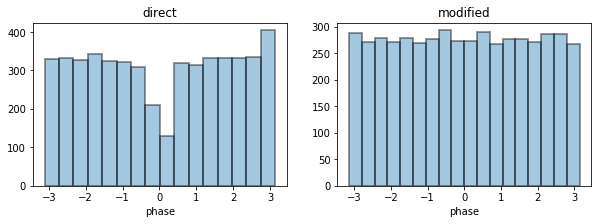

In [15]:
from scipy.linalg import qr, eigvals
from seaborn import distplot
import matplotlib.pyplot as plt

n = 50
repeats = 100

angles = []
angles_modified = []
for rp in range(repeats):
    H = np.random.randn(n, n)
    Q, R = qr(H)
    angles.append(np.angle(eigvals(Q)))
    Q_modified = Q @ np.diag(np.exp(1j * np.pi * 2 * np.random.rand(n)))
    angles_modified.append(np.angle(eigvals(Q_modified))) 

fig, ax = plt.subplots(1,2, figsize = (10,3))
distplot(np.asarray(angles).flatten(),kde = False, hist_kws=dict(edgecolor="k", linewidth=2), ax= ax[0])
ax[0].set(xlabel='phase', title='direct')
distplot(np.asarray(angles_modified).flatten(),kde = False, hist_kws=dict(edgecolor="k", linewidth=2), ax= ax[1])
ax[1].set(xlabel='phase', title='modified');